AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase

###Upload Required Libraries and import the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from datetime import datetime
from matplotlib import pyplot as plt
import os
import matplotlib.style
plt.style.use('classic')
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_excel("/content/drive/MyDrive/Kaggle/marketing_campaign.xlsx")

###Information about the Data

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [7]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  2240 
no. of columns:  29


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isnull().sum().sort_values(ascending=False)

,0
Income,24
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [11]:
df["Income"] = df["Income"].fillna(df["Income"].median()) #treating the null values with the median
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True) #dropping two columns of no use

###Treating Duplicates

In [17]:
df=df.drop('ID', axis=1) #Dropping the 'ID' column

KeyError: "['ID'] not found in axis"

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

In [ ]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

###Checking each variable and treating them

In [18]:
current_year = datetime.now().year
df["Age"] = current_year - df["Year_Birth"]
df["Customer_For"] = (pd.to_datetime("today") - pd.to_datetime(df["Dt_Customer"])).dt.days

In [19]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_For
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,68,4611
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,71,4061
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,60,4260
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,41,4087
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,44,4109


In [20]:
df["Education"].value_counts()

,count
Education,
Graduation,1030
PhD,450
Master,341
2n Cycle,188
Basic,49


In [21]:
df['Marital_Status'] = df['Marital_Status'].replace({"Together":"Married","Alone":"Single","Absurd":"Single","YOLO":"Single"})

In [22]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
Married,1316
Single,455
Divorced,216
Widow,71


In [23]:
df["Kidhome"].value_counts()

,count
Kidhome,
0,1184
1,831
2,43


In [24]:
df["Teenhome"].value_counts()

,count
Teenhome,
0,1060
1,948
2,50


In [25]:
df["Recency"].value_counts()

,count
Recency,
56,30
46,28
29,28
2,28
49,28
...,...
5,13
15,13
22,11


In [26]:
df["MntWines"].value_counts()

,count
MntWines,
2,39
5,37
6,34
1,33
4,31
...,...
671,1
611,1
626,1


In [27]:
df["MntFruits"].value_counts()

,count
MntFruits,
0,368
1,148
2,113
3,104
4,93
...,...
131,1
140,1
149,1


In [28]:
df["MntMeatProducts"].value_counts()

,count
MntMeatProducts,
5,46
7,45
11,44
8,40
3,38
...,...
213,1
940,1
801,1


In [29]:
df["MntFishProducts"].value_counts()

,count
MntFishProducts,
0,359
2,144
3,122
4,99
6,77
...,...
181,1
81,1
128,1


In [30]:
df["MntSweetProducts"].value_counts()

,count
MntSweetProducts,
0,386
1,150
2,119
3,94
4,73
...,...
262,1
179,1
100,1


In [31]:
df["MntGoldProds"].value_counts()

,count
MntGoldProds,
1,68
3,66
4,63
5,59
12,58
...,...
245,1
229,1
248,1


In [32]:
df["NumDealsPurchases"].value_counts()

,count
NumDealsPurchases,
1,881
2,459
3,276
4,179
5,85
6,58
0,42
7,34
8,14


In [33]:
df["NumWebPurchases"].value_counts()

,count
NumWebPurchases,
2,343
1,323
3,310
4,253
5,202
6,191
7,144
8,94
9,66


In [34]:
df["NumCatalogPurchases"].value_counts()

,count
NumCatalogPurchases,
0,537
1,453
2,259
3,174
4,168
5,129
6,110
7,72
8,52


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2058 non-null   int64  
 1   Education            2058 non-null   object 
 2   Marital_Status       2058 non-null   object 
 3   Income               2058 non-null   float64
 4   Kidhome              2058 non-null   int64  
 5   Teenhome             2058 non-null   int64  
 6   Dt_Customer          2058 non-null   object 
 7   Recency              2058 non-null   int64  
 8   MntWines             2058 non-null   int64  
 9   MntFruits            2058 non-null   int64  
 10  MntMeatProducts      2058 non-null   int64  
 11  MntFishProducts      2058 non-null   int64  
 12  MntSweetProducts     2058 non-null   int64  
 13  MntGoldProds         2058 non-null   int64  
 14  NumDealsPurchases    2058 non-null   int64  
 15  NumWebPurchases      2058 non-null   int64 

In [36]:
df["NumStorePurchases"].value_counts()

,count
NumStorePurchases,
3,448
4,295
2,207
5,197
6,164
8,136
7,133
10,118
9,99


In [37]:
df["NumWebVisitsMonth"].value_counts()

,count
NumWebVisitsMonth,
7,359
6,311
8,310
5,260
4,201
3,191
2,183
1,140
9,80


In [38]:
df["AcceptedCmp3"].value_counts()

,count
AcceptedCmp3,
0,1907
1,151


In [39]:
df["AcceptedCmp4"].value_counts()

,count
AcceptedCmp4,
0,1900
1,158


In [40]:
df["AcceptedCmp5"].value_counts()

,count
AcceptedCmp5,
0,1910
1,148


In [41]:
df["AcceptedCmp1"].value_counts()

,count
AcceptedCmp1,
0,1923
1,135


In [42]:
df["AcceptedCmp2"].value_counts()

,count
AcceptedCmp2,
0,2032
1,26


In [43]:
df["Complain"].value_counts()

,count
Complain,
0,2038
1,20


In [44]:
df["Response"].value_counts()

,count
Response,
0,1745
1,313


In [45]:
df=df.drop('Year_Birth', axis=1)
df=df.drop('Dt_Customer', axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2058 non-null   object 
 1   Marital_Status       2058 non-null   object 
 2   Income               2058 non-null   float64
 3   Kidhome              2058 non-null   int64  
 4   Teenhome             2058 non-null   int64  
 5   Recency              2058 non-null   int64  
 6   MntWines             2058 non-null   int64  
 7   MntFruits            2058 non-null   int64  
 8   MntMeatProducts      2058 non-null   int64  
 9   MntFishProducts      2058 non-null   int64  
 10  MntSweetProducts     2058 non-null   int64  
 11  MntGoldProds         2058 non-null   int64  
 12  NumDealsPurchases    2058 non-null   int64  
 13  NumWebPurchases      2058 non-null   int64  
 14  NumCatalogPurchases  2058 non-null   int64  
 15  NumStorePurchases    2058 non-null   int64 

###**Univariate Analysis**

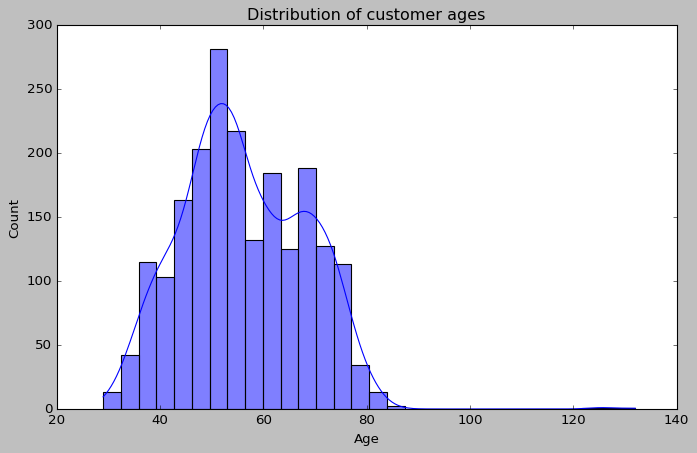

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribution of customer ages")
plt.show()

The majority of customers are between 40 and 60 years old.

Outlier at 121 years old (born in 1893).

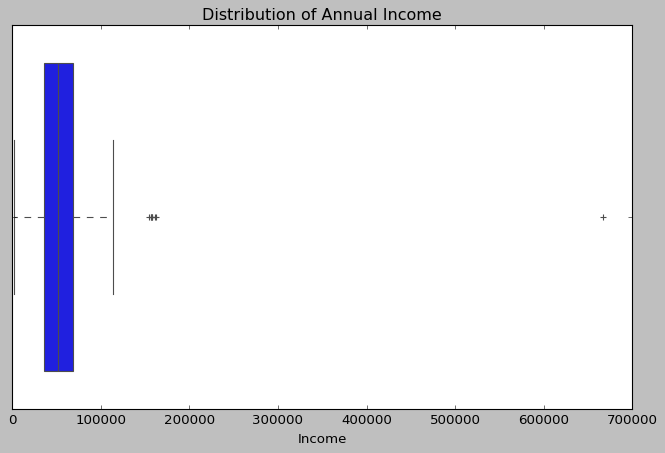

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Income"])
plt.title("Distribution of Annual Income")
plt.show()

Median income around 50,000.
Some extreme values (> 150,000).

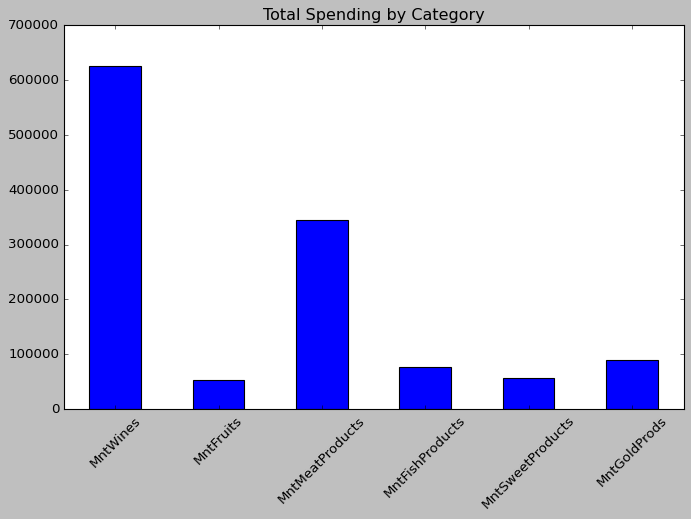

In [49]:
mnt_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df[mnt_cols].sum().plot(kind="bar", figsize=(10, 6))
plt.title("Total Spending by Category")
plt.xticks(rotation=45)
plt.show()

Wines and meats dominate the spending.
Fruits and fish are purchased less.

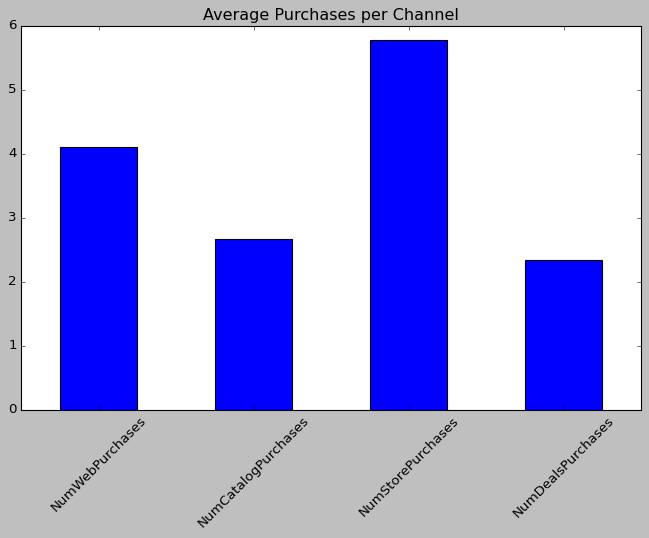

In [50]:
purchase_cols = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases"]
df[purchase_cols].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Average Purchases per Channel")
plt.xticks(rotation=45)
plt.show()

In-store purchases are more frequent followed by Online Purchases.
Catalog purchases and Purchases done by coupons are equivalent.

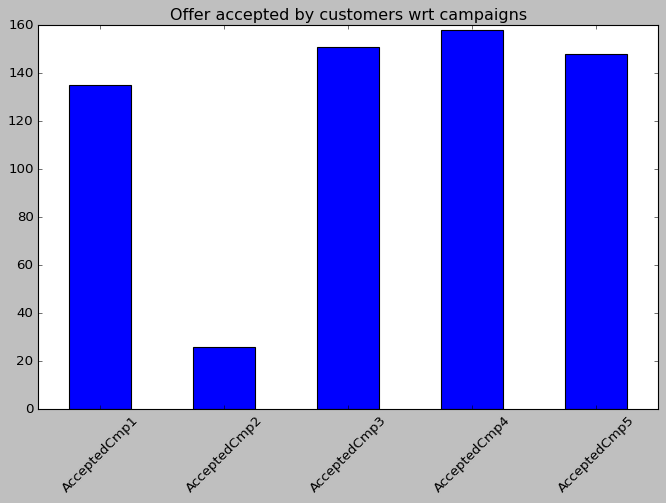

In [51]:
acc_cmp_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
df[acc_cmp_cols].sum().plot(kind="bar", figsize=(10, 6))
plt.title("Offer accepted by customers wrt campaigns")
plt.xticks(rotation=45)
plt.show()

Acceptance of offer is least in the second campaign. All other campaigns are equivalent.

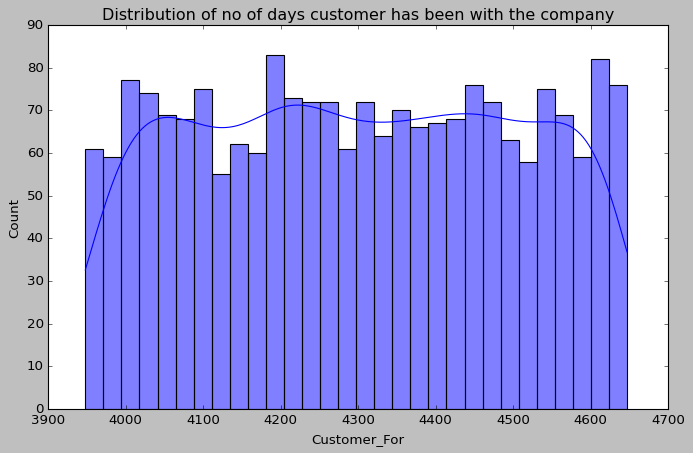

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Customer_For"], bins=30, kde=True)
plt.title("Distribution of no of days customer has been with the company")
plt.show()

mostly the customers are with the company since 10 - 12 years

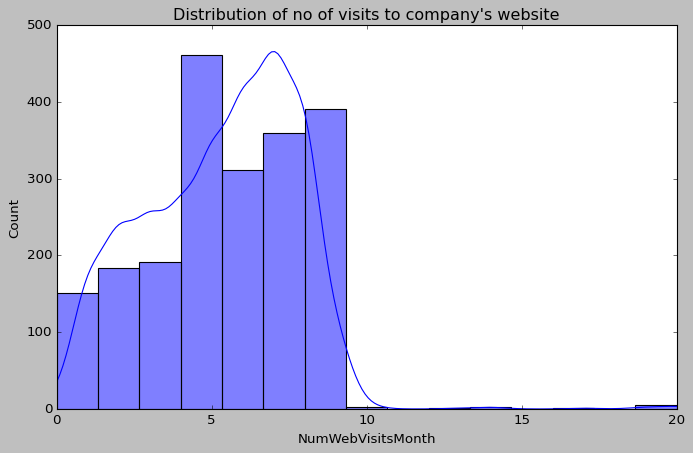

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df["NumWebVisitsMonth"], bins=15, kde=True)
plt.title("Distribution of no of visits to company's website")
plt.show()

mostly the number of visits to the company's website lies between 2 and 6

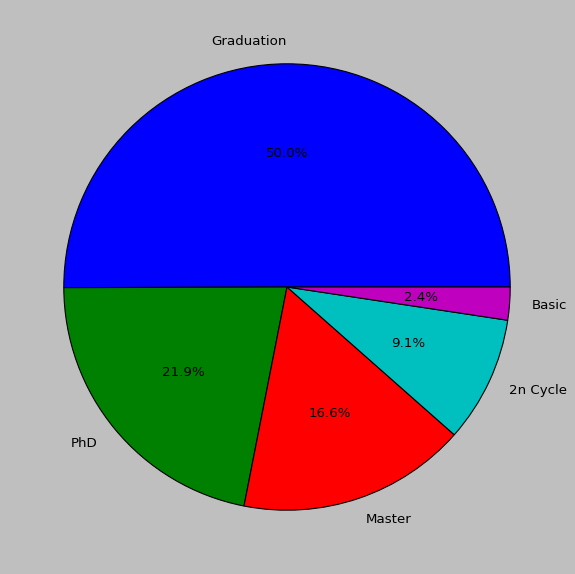

In [54]:
plt.figure(figsize=(9,9))
plt.pie(df["Education"].value_counts(),labels=df["Education"].value_counts().index,autopct='%1.1f%%')
plt.show()

50% of the customers are graduated. Only 2.4% of the customers are with basic education.

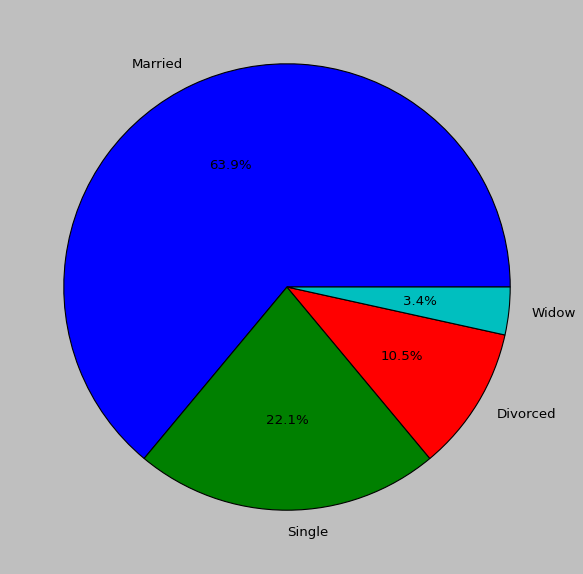

In [55]:
plt.figure(figsize=(9,9))
plt.pie(df["Marital_Status"].value_counts(),labels=df["Marital_Status"].value_counts().index,autopct='%1.1f%%')
plt.show()

63.9% of the customers are married or together and the rest are either single, divorced or widowed.

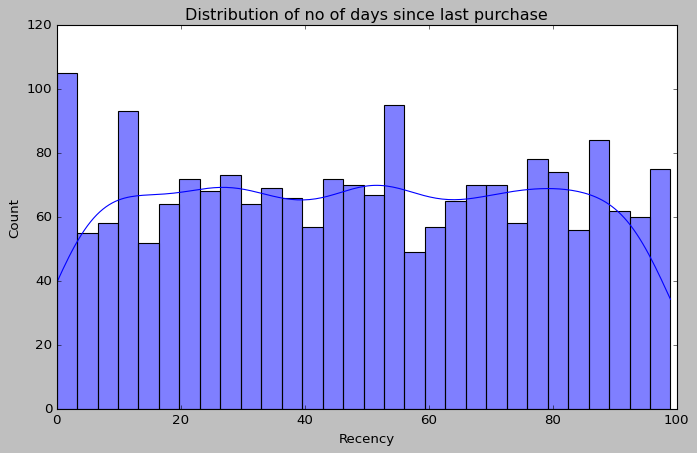

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Recency"], bins=30, kde=True)
plt.title("Distribution of no of days since last purchase")
plt.show()

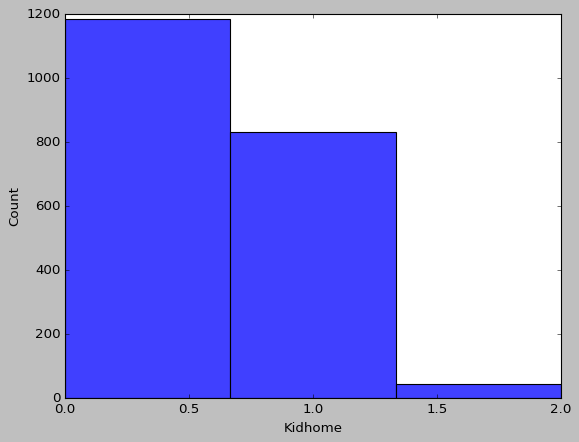

In [57]:
sns.histplot(df['Kidhome'],bins=3);

Around 800 customers have 1 kid. only a few have 2

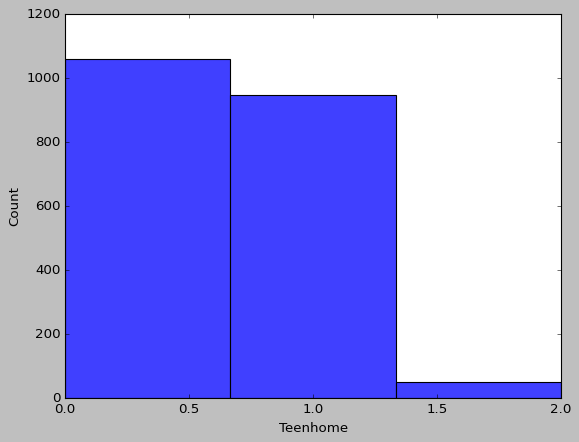

In [58]:
sns.histplot(df['Teenhome'],bins=3);

more than 800 customers have 1 teenager. only a few have 2

###**Bivariate and Multivariate Analysis**

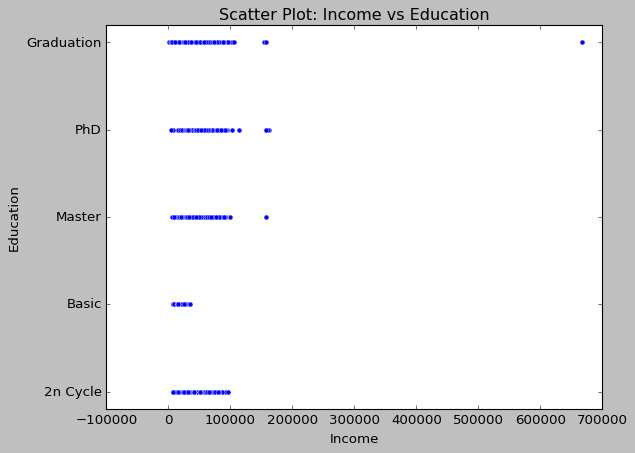

In [59]:
sns.scatterplot(x='Income', y='Education', data=df)
plt.title("Scatter Plot: Income vs Education")
plt.show()

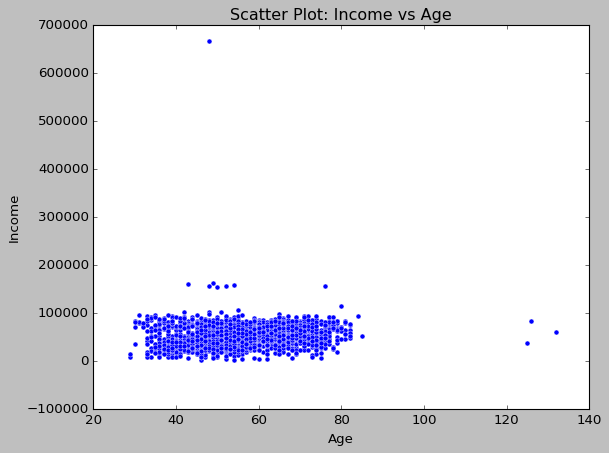

In [60]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.title("Scatter Plot: Income vs Age")
plt.show()

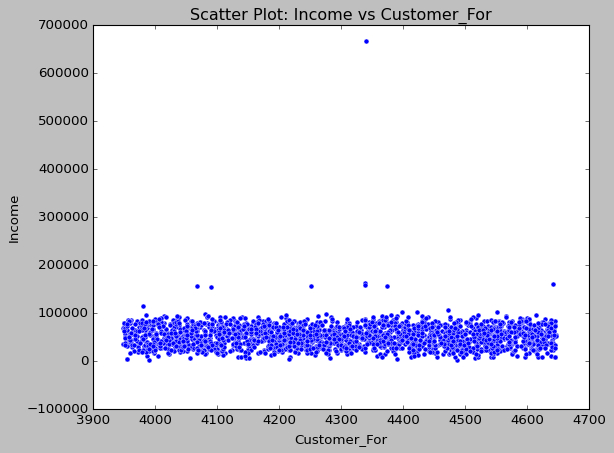

In [61]:
sns.scatterplot(x='Customer_For', y='Income', data=df)
plt.title("Scatter Plot: Income vs Customer_For")
plt.show()

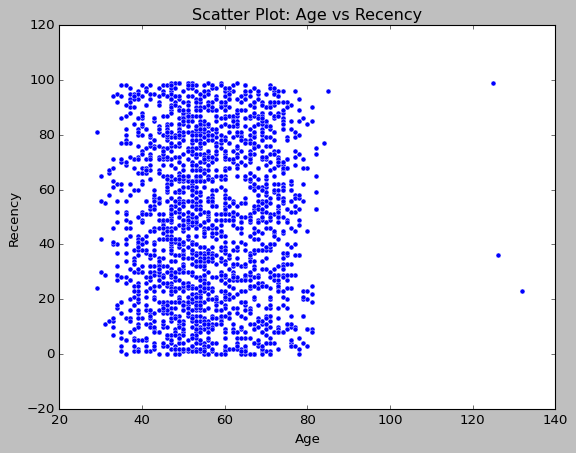

In [62]:
sns.scatterplot(x='Age', y='Recency', data=df)
plt.title("Scatter Plot: Age vs Recency")
plt.show()

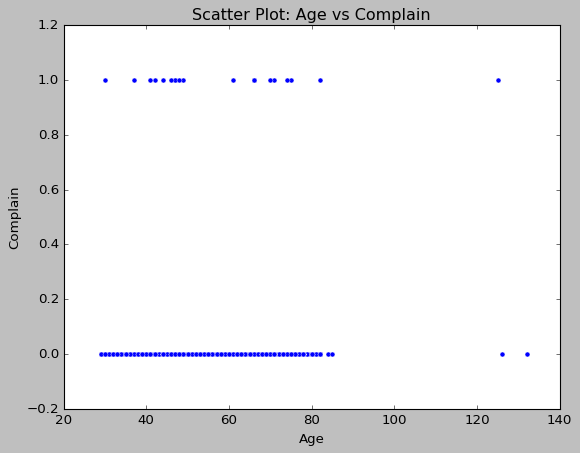

In [63]:
sns.scatterplot(x='Age', y='Complain', data=df)
plt.title("Scatter Plot: Age vs Complain")
plt.show()

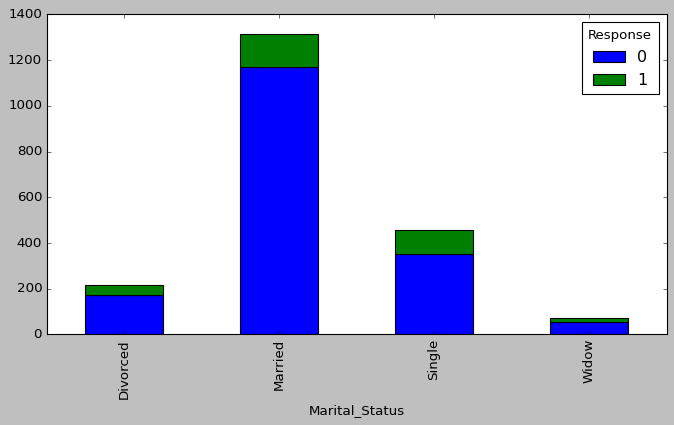

In [64]:
ct = pd.crosstab(df['Marital_Status'],df['Response'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

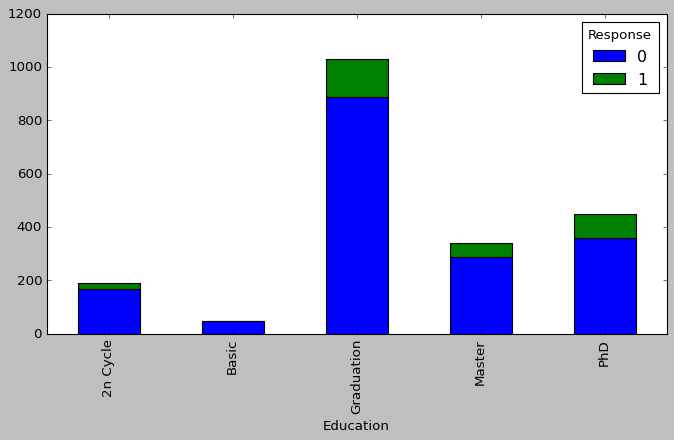

In [65]:
ct = pd.crosstab(df['Education'],df['Response'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

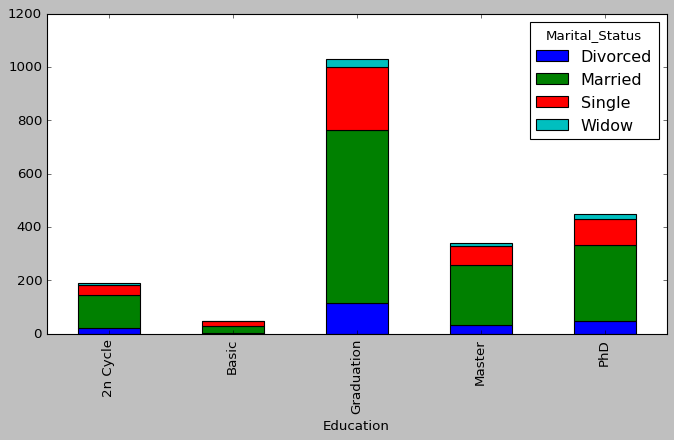

In [66]:
ct = pd.crosstab(df['Education'],df['Marital_Status'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

In [67]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

###**Outlier Treatment**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2058 non-null   object 
 1   Marital_Status       2058 non-null   object 
 2   Income               2058 non-null   float64
 3   Kidhome              2058 non-null   int64  
 4   Teenhome             2058 non-null   int64  
 5   Recency              2058 non-null   int64  
 6   MntWines             2058 non-null   int64  
 7   MntFruits            2058 non-null   int64  
 8   MntMeatProducts      2058 non-null   int64  
 9   MntFishProducts      2058 non-null   int64  
 10  MntSweetProducts     2058 non-null   int64  
 11  MntGoldProds         2058 non-null   int64  
 12  NumDealsPurchases    2058 non-null   int64  
 13  NumWebPurchases      2058 non-null   int64  
 14  NumCatalogPurchases  2058 non-null   int64  
 15  NumStorePurchases    2058 non-null   int64 

In [69]:
df['Response'] = df['Response'].astype("object")

In [70]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [71]:
for column in df.columns:
    if df[column].dtype != 'object':
         lower_range,upper_range = remove_outlier(df[column])
         df[column]=np.where(df[column]>upper_range,upper_range,df[column])
         df[column]=np.where(df[column]<lower_range,lower_range,df[column])

In [72]:
df['Response'] = df['Response'].astype("int64")

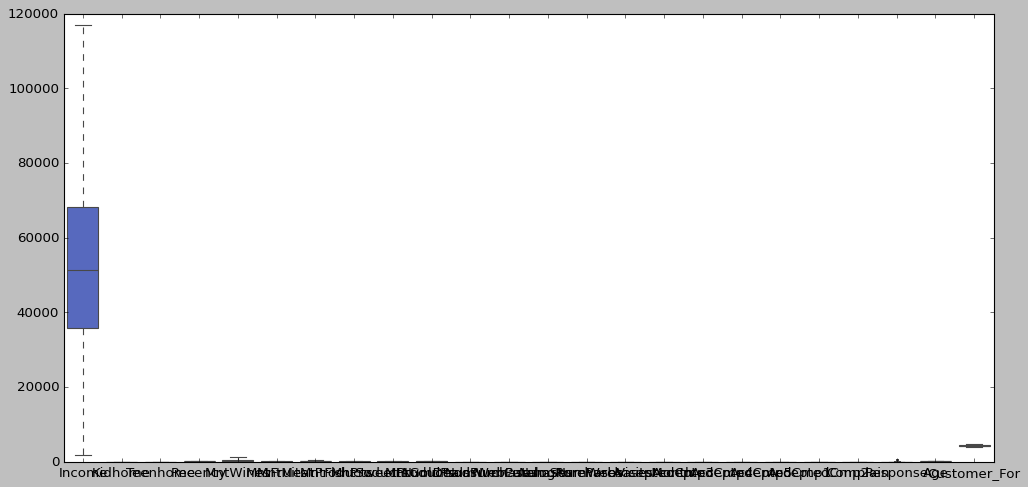

In [73]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, palette="coolwarm")
plt.show()

###**Clustering**

In [ ]:
#features = [
    #"Income", "Age", "Kidhome", "Teenhome", "Recency",
    #'NumDealsPurchases',"MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",'MntSweetProducts', 'MntGoldProds',
    #"NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",'NumWebVisitsMonth','Customer_For'
#]
#numerical_df = df[features]

In [74]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [75]:
cat=[] ## Identify categorical and numerical columns
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Education', 'Marital_Status']
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_For']


In [76]:
# Separate features and target
X = df[cat + num]  # Features
y = df['Response']  # Target

In [77]:
# Preprocessing: One-Hot Encoding for categorical & Scaling for numerical
preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), num),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), cat)
])

In [78]:
# Apply KMeans with the chosen number of clusters (e.g., 4 based on the elbow plot)
optimal_clusters = 4
kmeans = make_pipeline(preprocessor, KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10))

In [79]:
# Fit the pipeline and predict clusters
cluster_labels = kmeans.fit_predict(X)

X['Cluster'] = cluster_labels

In [80]:
# Analyze cluster distribution with respect to churn
cluster_churn = pd.crosstab(X['Cluster'], y)
print(cluster_churn)

Response    0    1
Cluster           
0         447   65
1         414  156
2         426   70
3         458   22


Customer Segmentation into 4 Groups:

Young individuals with low income (low spenders)

Wealthy customers (big spenders across all categories)

Older customers (average spending)

Young affluent individuals (high online consumption)

Marketing Applications:

Personalized targeting (tailored promotions)

Cross-selling strategy for high-spending clusters

Channel optimization (online vs. in-store)

###**Insights on the Analysis**

This analysis uncovers important customer behavior trends and offers actionable strategies rooted in sales data and marketing performance.

**Customer Demographics:** Most customers belong to the middle-income segment, favoring cost-effective products that deliver lasting value.

**Engaged Segments:** Married individuals with higher education levels represent the most responsive and high-spending group.

**Product Focus:** High-revenue items like wine present strong opportunities for targeted promotional campaigns.

**Shopping Preferences:** In-store purchases dominate, highlighting the importance of improving the physical shopping experience with enhanced services and loyalty programs.

**Growth Opportunities:** Despite gaps in customer enrollment data, there is untapped potential in promoting subscription programs with attractive benefits like discounts and rewards.

**Strategic Direction:** These insights support the creation of more personalized, data-driven marketing approaches aligned with customer preferences and behaviors.